<a href="https://colab.research.google.com/github/Sai-sharann/CODSOFT/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed Classification

This notebook builds an End-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1. Problem

Identifying the Breed of a Dog given the image of a Dog.

## 2. Data

The data we're using is from Kaggle Dog breed identification competition

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

Evaluation is a file with prediction probabilities for each  dog breed of each test image

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with image (unstructed data) so it's probably best we use deep learning and Transfer learning
* There are 120 breeds of dogs (This means there are 120 different classes).
* There are around 10,000+ images in the training set(These images have labels).
* There are around 10,000+ images in the test set (These images have no labels,because we'll have to predict them).

In [ ]:
# unzip the data into Google Drive
#!unzip "/content/sample_data/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

### Get our workspace ready

* Import Tensorflow 2.x
* Import Tensorflow Hub.
* Make sure we're using a GPU

In [ ]:
# import Tensorflow into colab
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
# import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF_hub version",hub.__version__)

# check for GPU availability
print("GPU available" if tf.config.list_physical_devices("GPU") else "GPU not available")

TF version: 2.12.0
TF_hub version 0.13.0
GPU available


# Getting our data ready (turning into tensors)
With all machine learning models,our data has to be in numerical format. So that's what we'll be doing first,Turning our dimages into Tensors(numerical representation)

Let's start by accessing our data and checking out the labels

In [ ]:
# Let's checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10221               10221
unique                             10221                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

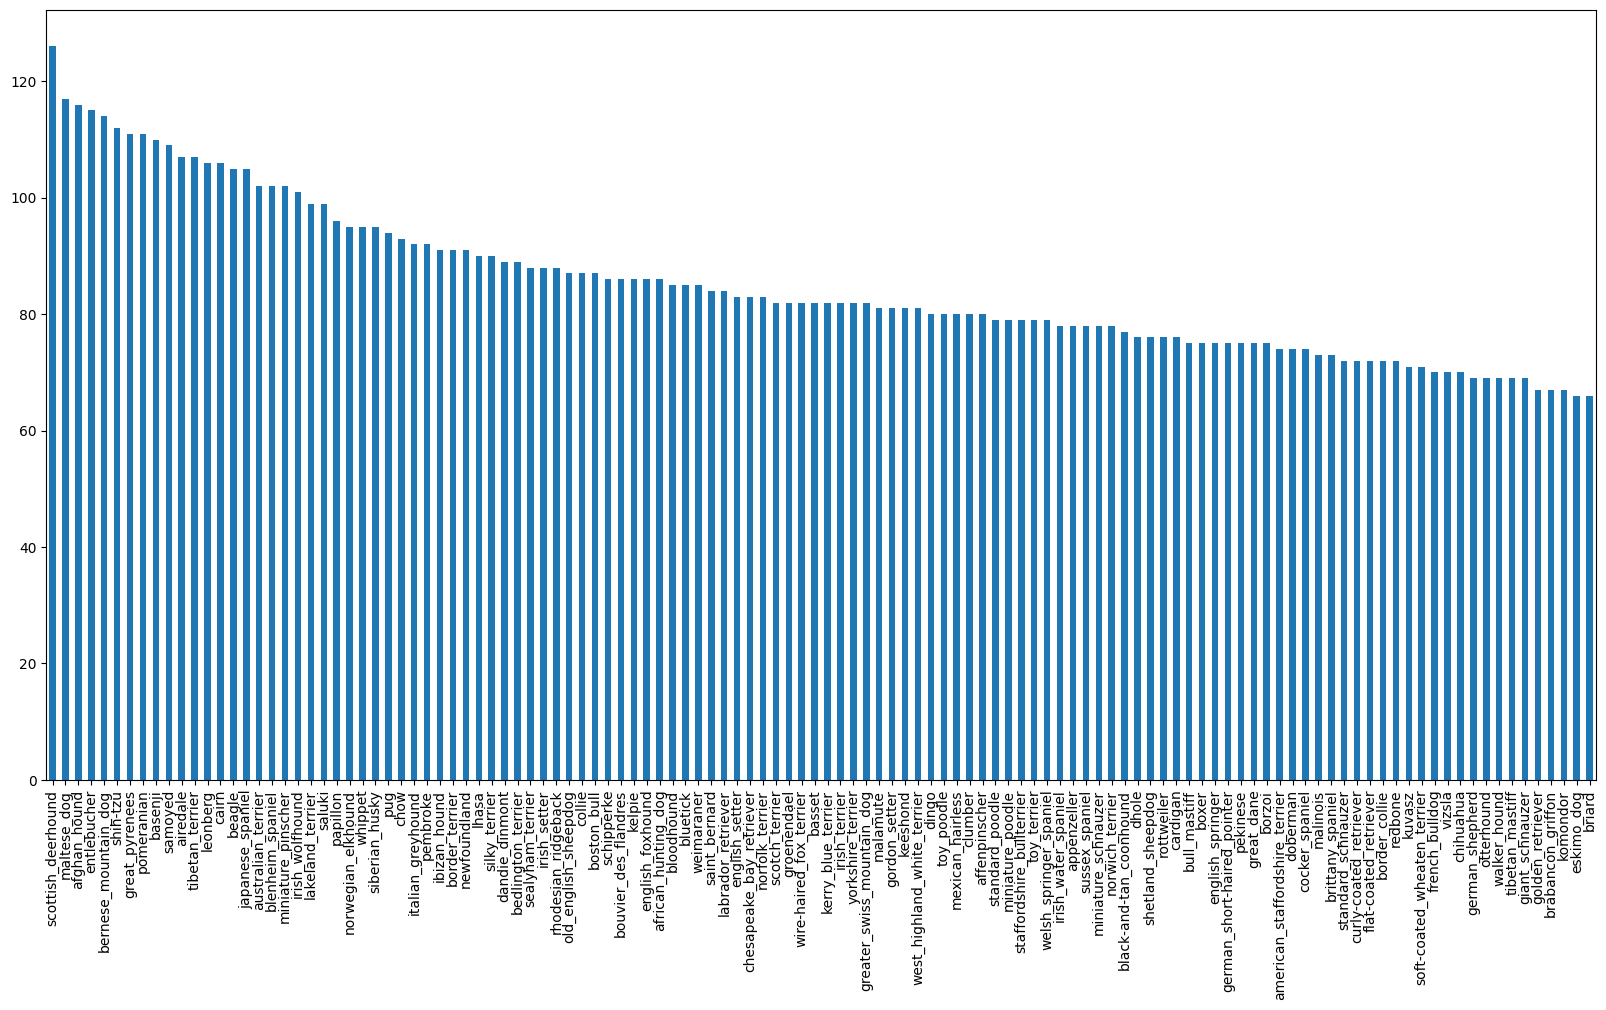

In [ ]:
#Let's plot the labels and have a simple visualization of the value count of each breed in our data
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
# This tells us how many images of each breed is contained in our data sets
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# Let's view an image
from IPython.display import Image
#Image("drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")


# Getting images and their pathnames

 Let's get a list of all our image file pathnames

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Create pathnames from image ids
filenames = ["drive/MyDrive/DogVision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# let's check out the first 10
filenames[:10]

['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(filenames)

10221

In [ ]:
# Let's check if the number of filenames matches the actual number of image files
import os
#if len(os.listdir("drive/MyDrive/DogVision/train")) == len(filenames) :
 # print("Number of files match , Please proceed with the code")
#else:
 # print("Error:Number of files mismatch ")

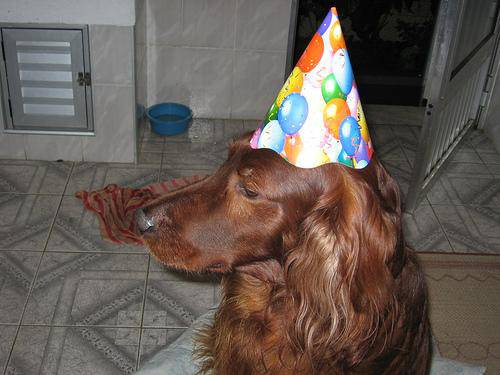

In [ ]:
#one more check
Image(filenames[2023])

In [ ]:
labels_csv["breed"][9000]

'doberman'

Since we've got our training image filepaths ina alist,let's prepare our labels

In [ ]:
import numpy as np
#labels = labels_csv["breed"].to_numpy() does the same
labels = np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10221

In [ ]:
# check if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames..!")
else:
  print("numbre of labels doesn't match the number of filenames , please check data directories")

Number of labels matches number of filenames..!


In [ ]:
 #Let's find the unique label values
 unique_breeds = np.unique(labels)
 len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Let's turn a single label into a array of boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels),boolean_labels[:2]

(10221,
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, F

In [ ]:
#Example turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) #index where label occur in boolean array
print(boolean_labels[0].astype(int)) #there will be one where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


###Creating our own validation set


In [ ]:
# Setup x & y variables
x = filenames
y = boolean_labels

We're going to start of experimenting with ~1000 images and increase as needed

In [ ]:
#Set the number of images used for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:500}

In [ ]:
from pandas.core.groupby.groupby import numba_
#Let's split our data into training and validation sets
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
#Let's have a geez at the traning data
x_train[:2],y_train[:2]

(['drive/MyDrive/DogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DogVision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

### Preprocessing Images (Turning them into tensors)

To preprocess our images into Tensors were going to write a function whch does a few tings

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable,`image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be shape of (224,224)
5. Return the modified `image`

Before we do ,Let's se what importing an image looks like


In [ ]:
# convert an image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
# To convert an image into Tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we've seen what an image looke like as a Tensor,Let's make a function to preprocess them.

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable,`image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image`(Convert image size from 0-224 to 0-1)
5. Resize the `image` to be shape of (224,224)
6. Return the modified `image`


In [ ]:
# Define image size
IMG_SIZE=224# Define image size
IMG_SIZE=224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns an image into a sensor
  """
  # Read an image file from pathnames
  image = tf.io.read_file(image_path)
  # Turn the jpeg images into numerical Tensors with 3-color channels (Red,Blue,Green)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channels values from 0-224 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired values
  image = tf.image.resize(image , size=[IMG_SIZE , IMG_SIZE])

  return image

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns an image into a Tensor
  """
  # Read an image file from pathnames
  image = tf.io.read_file(image_path)
  # Turn the jpeg images into numerical Tensors with 3-color channels (Red,Blue,Green)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channels values from 0-224 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired values
  image = tf.image.resize(image , size=[IMG_SIZE , IMG_SIZE])

  return image

### Turning our data into Batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images i one go...they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be)

In order to use Tensorflow effectively, we need our data in the form of Tensorflow tuples which looks like this : `(images,labels)`

In [ ]:
# Create a function to return a tuple (image,labels)
def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label).
  """
  image = process_image(image_path)
  return (image,label)

In [ ]:
# Demo of the above
(process_image( x[30]), tf.constant(y[30]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.66276264, 0.45491952, 0.29805675],
         [0.65488446, 0.44704136, 0.2901786 ],
         [0.64805675, 0.4441352 , 0.28727242],
         ...,
         [0.7713978 , 0.67915326, 0.4206802 ],
         [0.75814086, 0.6619048 , 0.36789224],
         [0.7363797 , 0.6657562 , 0.36185226]],
 
        [[0.6745974 , 0.46376055, 0.31288517],
         [0.6667192 , 0.4558824 , 0.305007  ],
         [0.6569678 , 0.45304626, 0.29917717],
         ...,
         [0.7934701 , 0.7012256 , 0.44275245],
         [0.78174037, 0.68251055, 0.39602235],
         [0.7674768 , 0.6893557 , 0.3914391 ]],
 
        [[0.6853642 , 0.4735995 , 0.32457986],
         [0.677486  , 0.46572134, 0.3167017 ],
         [0.67029303, 0.4663715 , 0.3134303 ],
         ...,
         [0.7915991 , 0.6956082 , 0.44473085],
         [0.7943693 , 0.6884869 , 0.41115203],
         [0.76919186, 0.6835999 , 0.40603185]],
 
        ...,
 
        [[0.28382748, 0.21217127

Now we've got a wway to turn our data into tuples of  Tensors in the form : `(image,label)`  , let's make a function to turn all our data (`x` & `y`) into Batches!.

In [ ]:
# Define the batchsize , 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x , y=None , batch_size=BATCH_SIZE , test_data=False , valid_data=False) :
  """
   Creates batches of data out of image (x) and label (y) pairs.
   Shuffles the data if it's training data ,but doesn't shuffle if its validation data.
   Also accepts test data as input (no labels).
  """
  # If its test data we probably don't have batches
  if test_data :
    print("Creating testing data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data :
    print("Creating vaidation data batches ......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else :
    print("Creating training data batches ........")
    # Turning filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image,label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train , y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches ........
Creating vaidation data batches ......


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches , however,this might be hard to understand/comprehend ,let's visualise them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

  # Set up the figure
  plt.figure(figsize = (15,15))
  # Loop through 25 images in a batch
  for i in range(25):
    # Create subplots (5 rows,5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

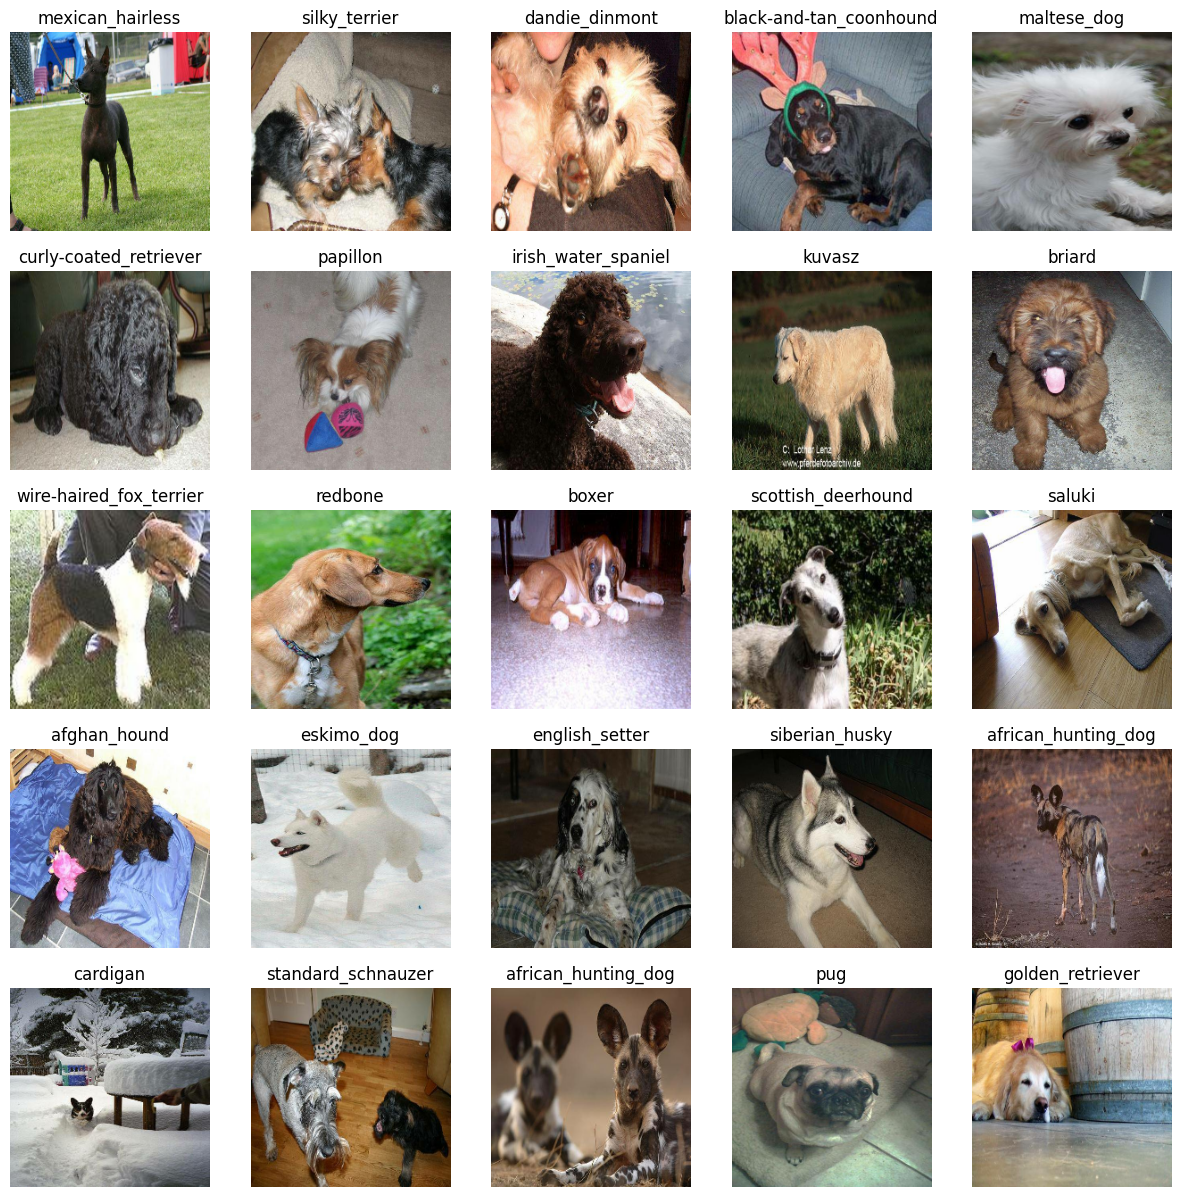

In [ ]:
train_images , train_labels = next(train_data.as_numpy_iterator())
# Now let's visualize the data in a training batch
show_25_images(train_images , train_labels)

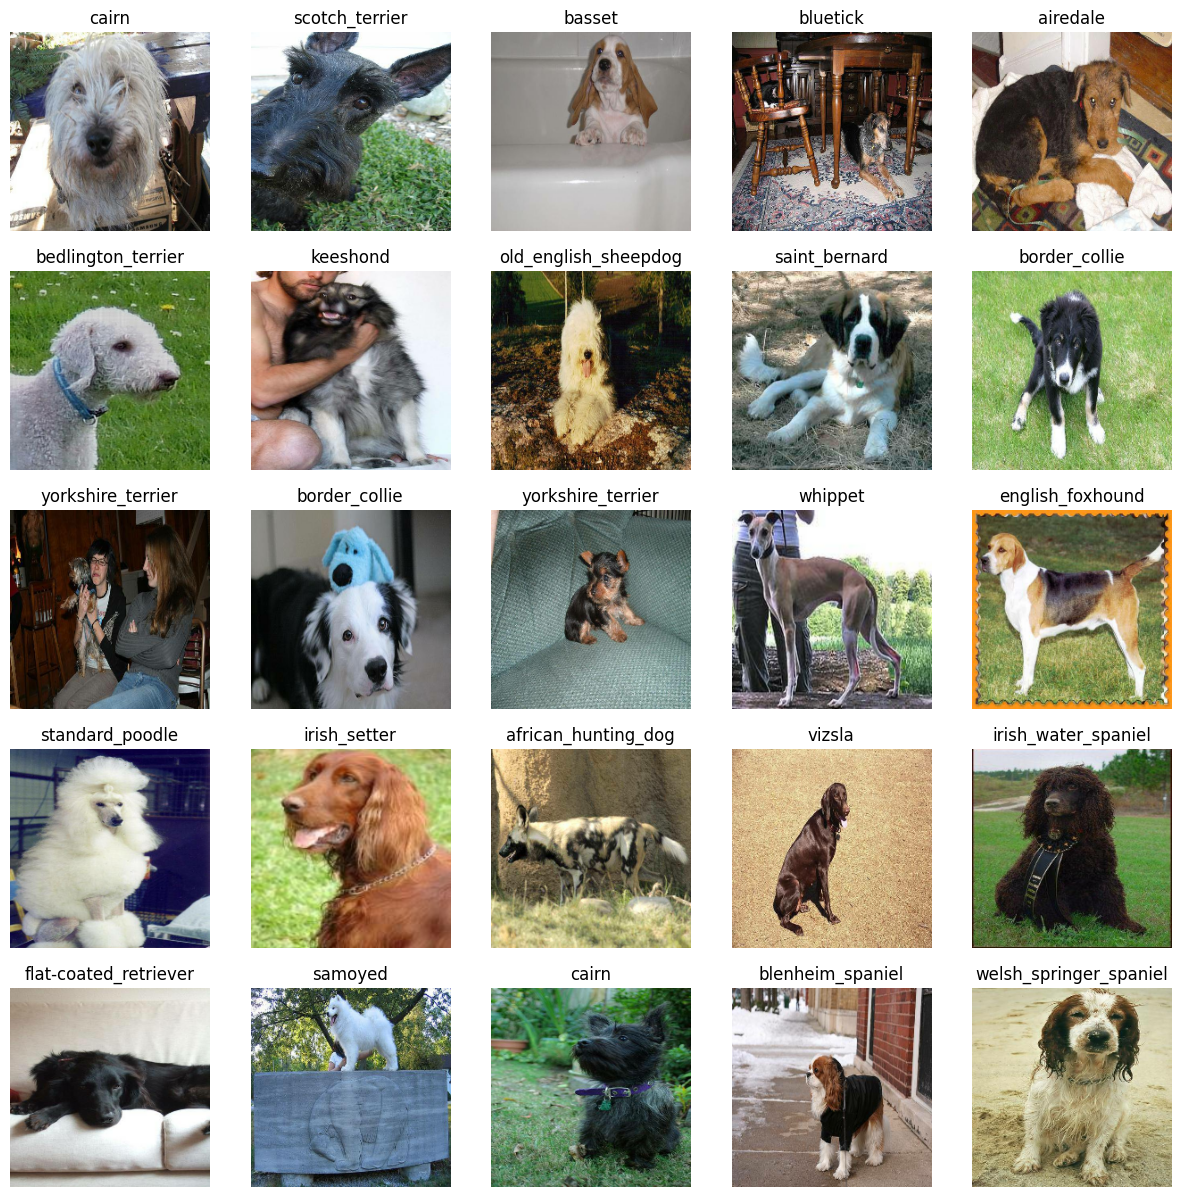

In [ ]:
# Now let's visualise validation data
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

##Building a Model

Before building a model,the're a few things we need to define:
* The input shape(our images shapes,in the form of Tensors) to our model.
* The output shape(image labels,in the form of Tensors) of our model.
* The URL of the model we want to use.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

# Setup the output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

Now we've got our inputs,outputs and model ready to go.Let's put them togther into  keras deep learning model!
Knowing this,let's create a function which :
* Takes the put shape,output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in a sequential fashion (do this first, then this,then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

In [ ]:
# Create a function which builds keras model
def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL):
  print("Creating model using",MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL) ,# Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)(sigmoid)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

Creating model using https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during trainning to do such things as save its progress or check its progress or stop training early if a model is improving.

We'll create two callbacks,one for tensorboard which helps track our models progress and another for early stopping which prevents our model from training for too long.

###TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our model training logs with the `%tensorBoard` magic function (We'll do this after model training).

In [ ]:
#Load tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime
#Create a function to build  a TensorBoard callback
def create_tensorboard_callback():
  #Create a log directory for storing TensorBoard logs
  logdir = os.path.join ("/content/drive/MyDrive/Dog_Vision/logs",
                         #Make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

###Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops imporving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
#Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100}

In [ ]:
#A function to train & return a trained model
def train_model():
  #create a model
  model=create_model()
  #create new TensorBoard session
  tensorboard=create_tensorboard_callback()
  #fit the model to data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model


In [ ]:
#model=train_model()

##checking Tensorboard logs

In [ ]:
#Creating tensorboard Logs
%tensorboard --logdir drive/MyDrive/Dog_Vision/logs

ERROR: Failed to launch TensorBoard (exited with -6).
Contents of stderr:
2023-07-13 11:45:38.823702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
W0713 11:45:40.515785 140045688678144 plugin_event_accumulator.py:369] Found more than one graph event per run, or 

##Making & Evaluating Predictions using trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#making predictions on validation data
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 4s 151ms/step


array([[0.01011616, 0.01470733, 0.00358582, ..., 0.02684859, 0.00047779,
        0.00509918],
       [0.0372183 , 0.01214029, 0.00701548, ..., 0.00253396, 0.00919812,
        0.02871663],
       [0.00247654, 0.00020896, 0.0022861 , ..., 0.00646877, 0.00050844,
        0.00252834],
       ...,
       [0.01726434, 0.00263022, 0.01023423, ..., 0.01596344, 0.00342462,
        0.00064541],
       [0.01110842, 0.0215775 , 0.00101408, ..., 0.00068903, 0.00252938,
        0.00878434],
       [0.00518105, 0.00614507, 0.02786933, ..., 0.00018064, 0.01608573,
        0.00224066]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
#first prediction
index=0
print(predictions[index])
print(f"Max value:{np.max(predictions[index])}")
print(f"sum:{np.sum(predictions[index])}")
print(f"max index: {np.argmax(predictions[index])}")
print(f"Predictions label: {unique_breeds[np.argmax(predictions[index])]}")

[1.0116158e-02 1.4707327e-02 3.5858189e-03 2.0208778e-02 5.6595607e-03
 2.0216279e-02 1.1501572e-02 1.9168345e-02 1.2521420e-03 2.0877991e-03
 4.1265710e-04 1.1130119e-03 6.1986916e-04 5.5381196e-04 1.1218645e-02
 1.2968359e-02 2.2789771e-03 2.9146594e-03 2.6076594e-03 1.1929970e-03
 6.4152833e-03 1.2319965e-03 1.0267395e-02 7.9540303e-03 2.7431380e-02
 5.2911313e-03 1.1984401e-02 1.0527831e-02 2.0882583e-03 6.3623670e-03
 8.5663376e-03 2.9434223e-04 2.7461296e-02 1.2830612e-03 9.4537372e-03
 7.9352632e-03 2.3803808e-02 1.5778575e-03 2.5494574e-02 7.6349550e-03
 1.1978959e-03 5.5871787e-04 1.4619769e-03 8.1390366e-03 6.9877080e-04
 2.2317132e-03 2.5150580e-03 2.7071575e-03 2.0475196e-02 3.9613117e-03
 1.6913165e-03 1.3931181e-02 1.5438101e-03 1.2937294e-03 4.1246526e-03
 3.9667180e-03 5.8550006e-03 6.2047332e-03 5.4759244e-03 6.2597776e-03
 4.9533520e-04 1.2806811e-03 5.4389951e-03 5.0715767e-03 3.2346041e-03
 7.0722462e-03 6.3808192e-04 6.5033883e-03 7.0775585e-04 3.8516512e-03
 5.527

In [ ]:
#Turning Prediction probabilities in to their respective labels

def get_pred_label(pred_prob):
  """
  Turns an array of prediction probabilities in to labels
  """
  return unique_breeds[np.argmax(pred_prob)]

pred_label=get_pred_label(predictions[0])
pred_label

'toy_poodle'

##Unbatch the Batches

In [ ]:
#Function to Unbatch The Dataset
def unbatcher(data):
  images=[]
  labels=[]
  #Loop through unbatched data
  for image,label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

#Unabching the Validation data
val_images,val_labels=unbatcher(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(pred_prob,labels,images,n=1):
  pred_probab,true_label,images= pred_prob[n],labels[n],images[n]
  #get the pred Labels
  pred_label=get_pred_label(pred_probab)

  #plot images & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change the colou rof title depending on the prediction
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_probab)*100,
                                    true_label),
                                    color=color)


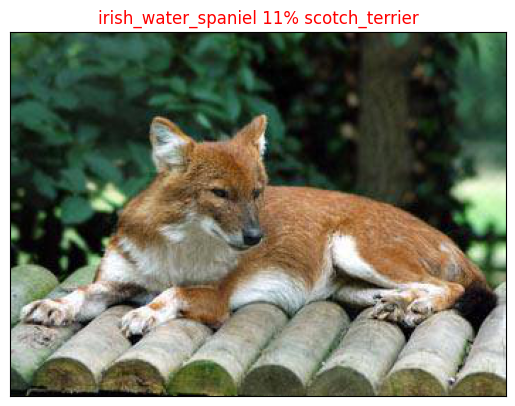

In [ ]:
plot_pred(pred_prob=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(pred_prob,labels,n=0):
    pred_probab,true_label=pred_prob[n],labels[n]
    #Get predicted Label
    pred_label=get_pred_label(pred_probab)
    #Find top 10 prediction confidence indexes
    top_pred_index=pred_probab.argsort()[-10:][::-1]
    #Find top 10 prediction confidence values
    top_pred_values=pred_probab[top_pred_index]
    #Find top 10 prediction confidence labels
    top_pred_labels=unique_breeds[top_pred_index]

    #plot setup
    top_plot=plt.bar(np.arange(len(top_pred_labels)),
                     top_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_pred_labels)),
               labels=top_pred_labels,
               rotation="vertical")
    #change colour for true Labels
    if np.isin(true_label,top_pred_labels):
        top_plot[np.argmax(top_pred_labels==true_label)].set_color("green")
    else:
        pass


In [ ]:
predictions[1].argsort()[-10:]

array([ 41,  82,   4, 119, 115,  45,   0,  57,  89,  58])

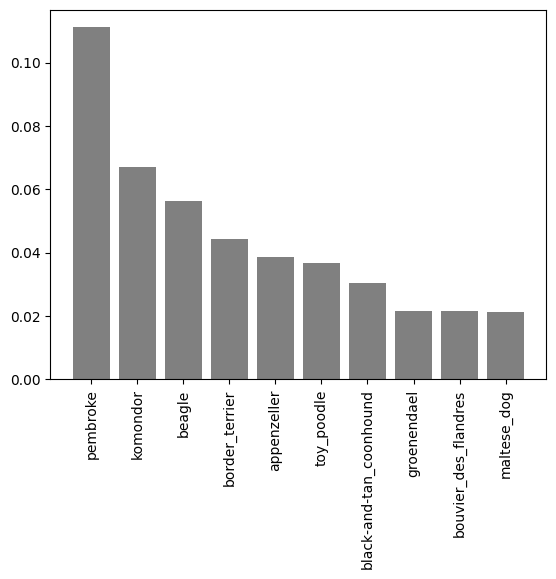

In [ ]:
plot_pred_conf(pred_prob=predictions,
               labels=val_labels,
               n=7)

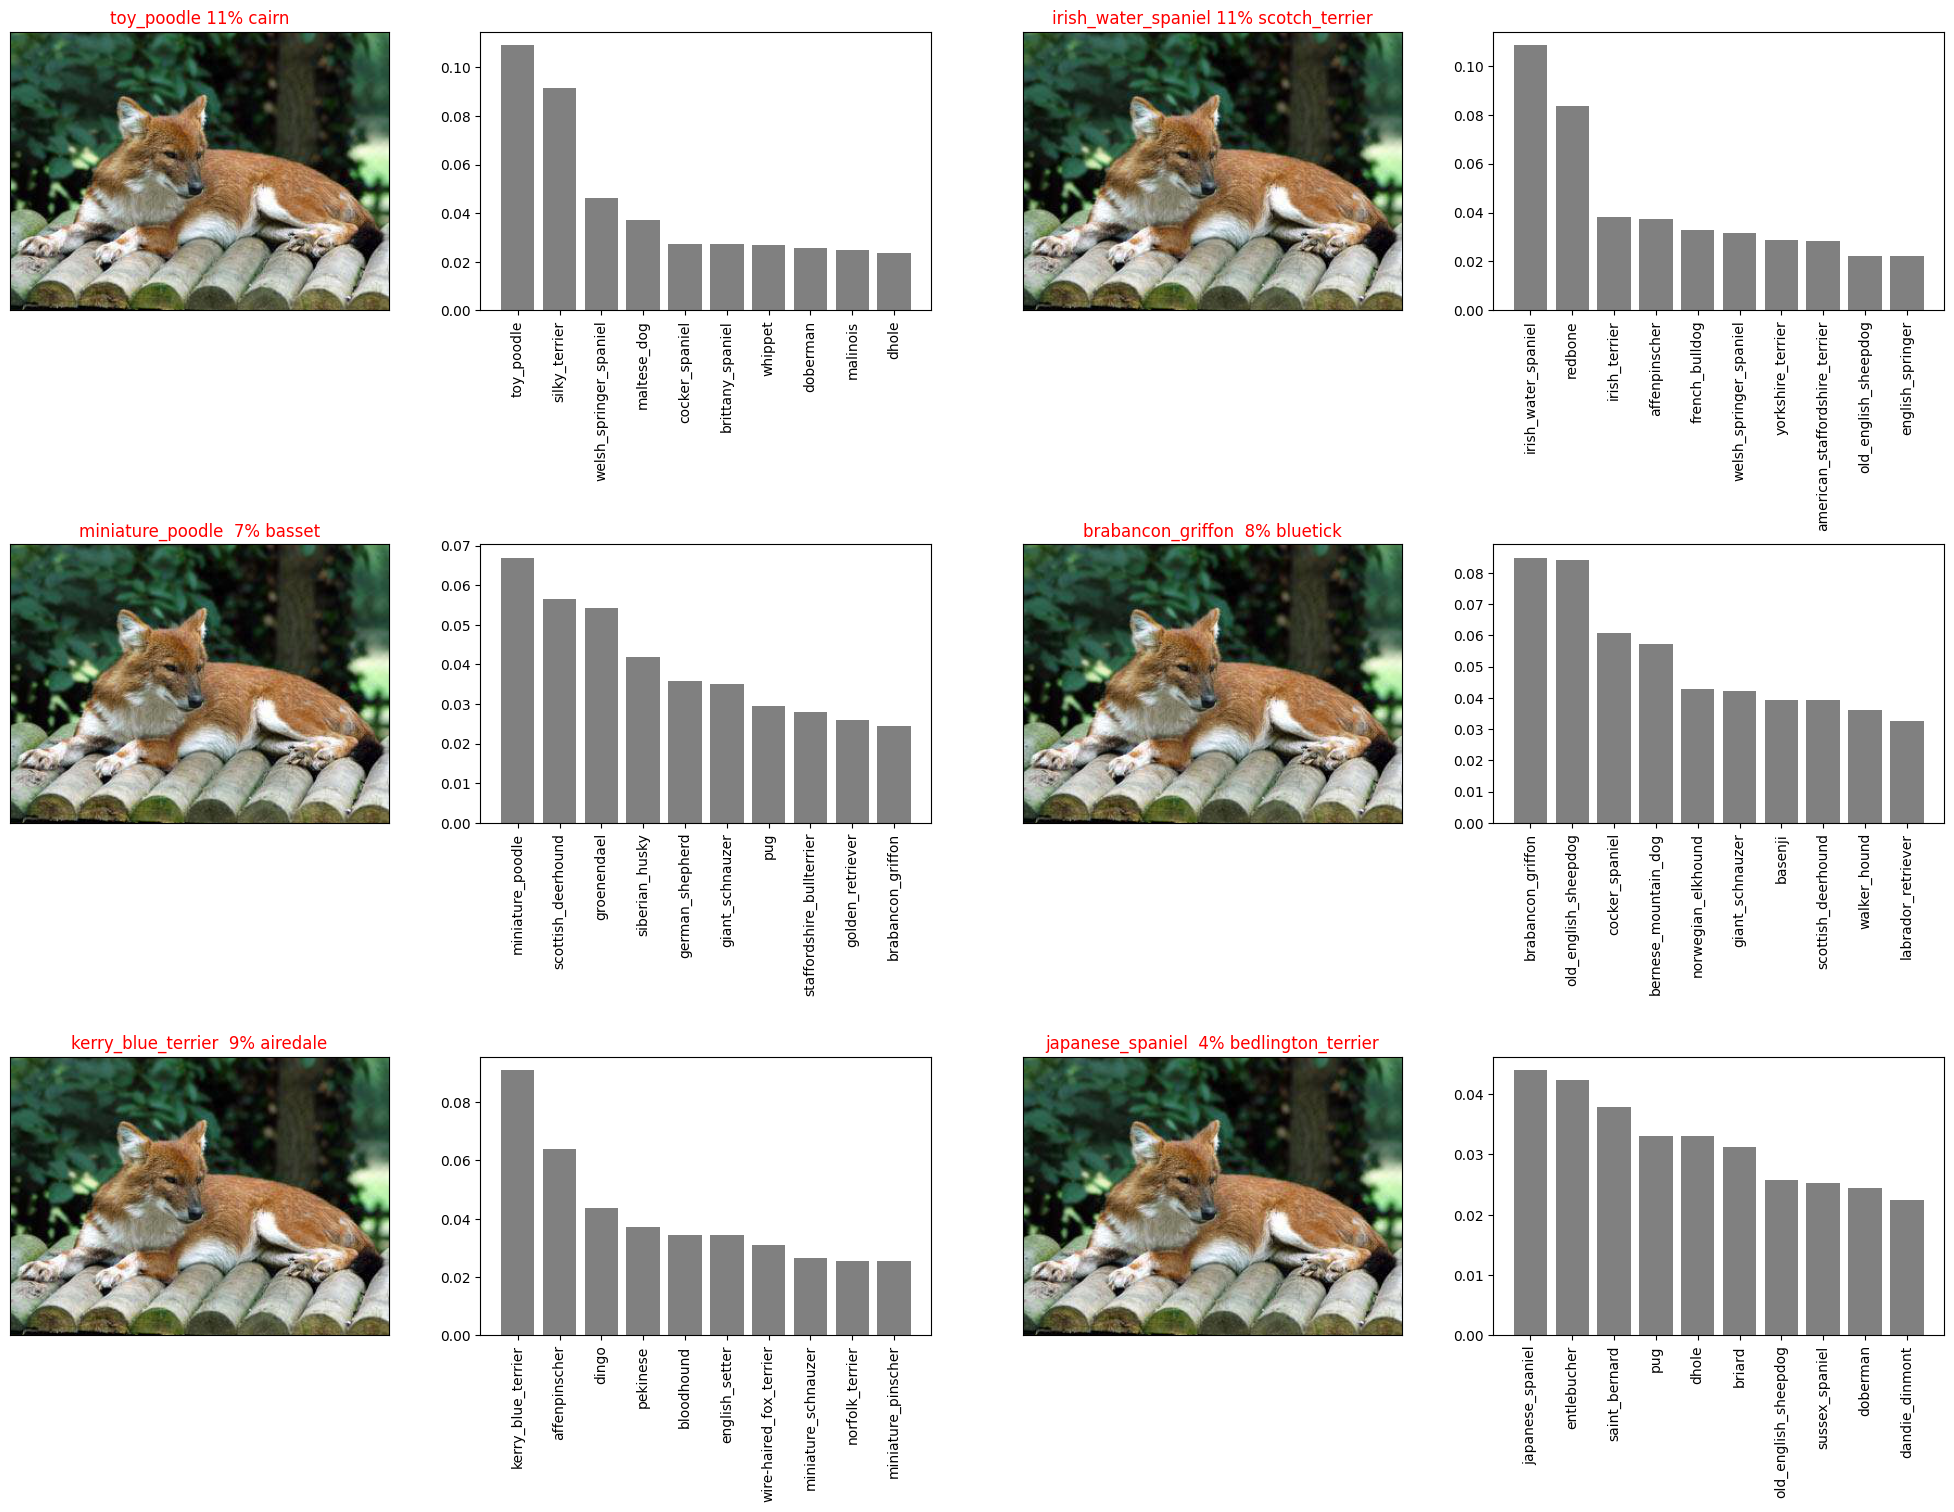

In [ ]:
#Let's check out few more predictions & values
i_mult=0
n_rows=3
n_cols=2
n_img=n_rows*n_cols
plt.figure(figsize=(10*n_cols,5*n_rows))

for i in range(n_img):
    plt.subplot(n_rows,2*n_cols,2*i+1)
    plot_pred(pred_prob=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_mult)
    plt.subplot(n_rows,2*n_cols,2*i+2)
    plot_pred_conf(pred_prob=predictions,
                   labels=val_labels,
                   n=i+i_mult)
plt.tight_layout(h_pad=1.0)
plt.show()

##Saving & Load Trained model

In [ ]:
#Create a function to save a model
def save_model(model,suffix=None):
    #Create model Directory
    modeldir=os.path.join("drive/MyDrive/DogVision/Models",datetime.datetime.now().strftime("%Y%m%d=%H%M%s"))
    model_path=modeldir+"-"+suffix+".h5"#Saving Format of Model
    print(f"Saving Model to :{model_path}.....")
    model.save(model_path)
    return model_path

In [ ]:
#Create a Function to load a trained Model
def load_model(model_path):
    print(f"Lodinng Saved model from :{model_path}")
    model=tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [ ]:
#Save our trained Model
#save_model(model,suffix="1000-image-mobilenet_v2_140-Adam")

In [ ]:
loaded_model=load_model("drive/MyDrive/DogVision/Models/20230621=07351687332902-1000-image-mobilenet_v2_140-Adam.h5")

Lodinng Saved model from :drive/MyDrive/DogVision/Models/20230621=07351687332902-1000-image-mobilenet_v2_140-Adam.h5


**Evauating the Trained Model**


In [ ]:
#model.evaluate(val_data)

In [ ]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 1s 84ms/step - loss: 1.3055 - accuracy: 0.6850


[1.3054717779159546, 0.6850000023841858]

##Training model with Full Dataset

In [ ]:
len(filenames),len(boolean_labels)

(10221, 10221)

In [ ]:
#Creating Batches for All data
full_data=create_data_batches(filenames,boolean_labels)

Creating training data batches ........


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model=create_model()

Creating model using https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5


In [ ]:
full_model_tensorboard=create_tensorboard_callback()

full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

In [ ]:
#Fitting the model to Full Data
#full_model.fit(x=full_data,
        #       epochs=NUM_EPOCHS,
 #              callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
#save_model(full_model,suffix="full-image-set-trained-mobilenet_v2-Adam")

In [ ]:
vali_data=create_data_batches(x_val,y_val,valid_data=True)

Creating vaidation data batches ......


###Evaluating th Model which is Trained with Full DataSet

In [ ]:
#full_model.evaluate(vali_data)

In [ ]:
f_loaded_model=load_model("drive/MyDrive/DogVision/Models/20230621=08201687335659-full-image-set-trained-mobilenet_v2-Adam.h5")

Lodinng Saved model from :drive/MyDrive/DogVision/Models/20230621=08201687335659-full-image-set-trained-mobilenet_v2-Adam.h5


In [ ]:
f_loaded_model.evaluate(vali_data)

7/7 [==============================] - 2s 122ms/step - loss: 0.0070 - accuracy: 1.0000


[0.007017544005066156, 1.0]

##Make  Predictions on our Test Dataset


In [ ]:
filenames[:5]

['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
test_data=create_data_batches(filenames,test_data=True)

Creating testing data batches.....


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#test_pred=f_loaded_model.predict(test_data,verbose=1)

In [ ]:
#np.savetxt("/content/drive/MyDrive/DogVision/pred_labels.csv",test_pred,delimiter=",")
test_predictions=np.loadtxt("drive/MyDrive/DogVision/pred_labels.csv",delimiter=",")
test_predictions[:15]

array([[4.24451828e-11, 2.48373266e-11, 4.18596890e-09, ...,
        1.36821088e-08, 2.66872663e-10, 9.30514721e-10],
       [5.04813087e-15, 1.11918511e-13, 6.88017282e-11, ...,
        1.24652892e-08, 1.00146167e-11, 1.48146029e-14],
       [1.34324607e-09, 9.95693483e-08, 1.27893043e-10, ...,
        8.26087202e-12, 2.62870541e-12, 4.18524726e-09],
       ...,
       [1.42464728e-07, 2.11255493e-08, 8.04622147e-09, ...,
        1.42922228e-11, 9.52462820e-09, 2.08665796e-07],
       [3.67664336e-11, 2.26091657e-09, 1.51527022e-08, ...,
        6.41107611e-10, 4.39300729e-09, 3.68744146e-09],
       [1.21565165e-06, 1.68079065e-10, 6.50132526e-09, ...,
        8.38402503e-09, 9.76127467e-07, 2.27043696e-04]])

In [ ]:
pred_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
pred_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
filenames

['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/DogVision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/DogVision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/DogVision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/DogVision/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'driv

In [ ]:
#test_id=[os.path.splitext(path) for path in os.listdir(test_path_str)]
pred_df["id"]=filenames
pred_df.head()

id affenpinscher  \
0  drive/MyDrive/DogVision/train/000bec180eb18c76...           NaN   
1  drive/MyDrive/DogVision/train/001513dfcb2ffafc...           NaN   
2  drive/MyDrive/DogVision/train/001cdf01b096e06d...           NaN   
3  drive/MyDrive/DogVision/train/00214f311d5d2247...           NaN   
4  drive/MyDrive/DogVision/train/0021f9ceb3235eff...           NaN   

  afghan_hound african_hunting_dog airedale american_staffordshire_terrier  \
0          NaN                 NaN      NaN                            NaN   
1          NaN                 NaN      NaN                            NaN   
2          NaN                 NaN      NaN                            NaN   
3          NaN                 NaN      NaN                            NaN   
4          NaN                 NaN      NaN                            NaN   

  appenzeller australian_terrier basenji basset  ... toy_poodle toy_terrier  \
0         NaN                NaN     NaN    NaN  ...        NaN         NaN   
1         NaN                NaN     NaN    NaN  ...        NaN         NaN   
2         NaN                NaN     NaN    NaN  ...        NaN         NaN   
3         NaN                NaN     NaN    NaN  ...        NaN         NaN   
4         NaN                NaN     NaN    NaN  ...        NaN         NaN   

  vizsla walker_hound weimaraner welsh_springer_spaniel  \
0    NaN          NaN        NaN                    NaN   
1    NaN          NaN        NaN                    NaN   
2    NaN          NaN        NaN                    NaN   
3    NaN          NaN        NaN                    NaN   
4    NaN          NaN        NaN                    NaN   

  west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                         NaN     NaN                     NaN   
1                         NaN     NaN                     NaN   
2                         NaN     NaN                     NaN   
3                         NaN     NaN                     NaN   
4                         NaN     NaN                     NaN   

  yorkshire_terrier  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 121 columns]

In [ ]:
#pred_df[list(unique_breeds)]=test_pred
#pred_df.head()

In [ ]:
#pred_df.to_csv("drive/MyDrive/DogVision/full_model_predictions.csv",index=False)

##Making predictions on our Custom Data

In [ ]:
cus_path="drive/MyDrive/DogVision/images/"
cus_img_path=[cus_path+ fname for fname in os.listdir(cus_path)]
cus_img_path

In [ ]:
cus_data=create_data_batches(cus_img_path,test_data=True)
cus_data

Creating testing data batches.....


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
cus_pred=f_loaded_model.predict(cus_data)
cus_pred.shape

1/1 [==============================] - 2s 2s/step


(6, 120)

In [ ]:
cus_pred_labels=[get_pred_label(cus_pred[i]) for i in range(len(cus_pred))]
cus_pred_labels

['labrador_retriever',
 'english_foxhound',
 'golden_retriever',
 'chow',
 'siberian_husky',
 'pomeranian']

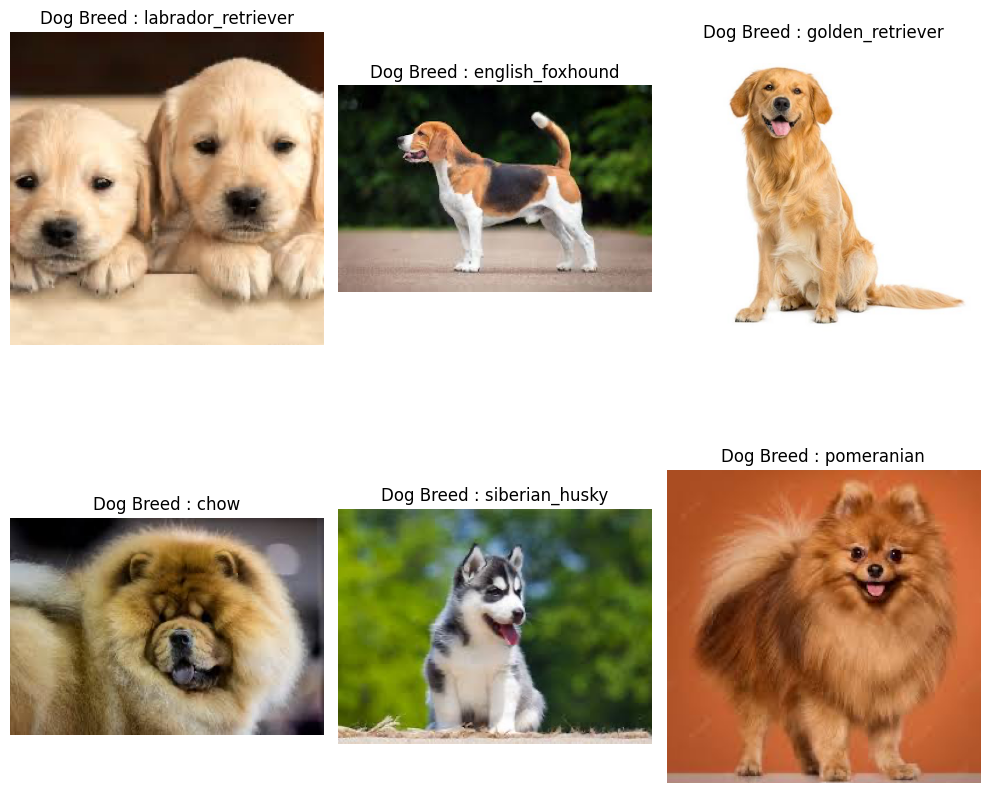

In [ ]:
# Calculate the number of rows and columns dynamically
num_images = len(cus_img_path)
num_cols = 3  # Number of columns to display
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows

# Display the predicted labels along with their respective images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_images):
    img = plt.imread(cus_img_path[i])
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Dog Breed : {cus_pred_labels[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


#                      THANK YOU